In [49]:
import os,shutil

In [51]:
original_data_directory = '/home/ashan/Desktop/Data/PIAIC/DeepLearning/Kaggle_original-data/train'

In [53]:
base_dir = '/home/ashan/Desktop/Data/PIAIC/Cat_Dog_Data'
os.mkdir(base_dir)

In [54]:
train_dir = os.path.join(base_dir,'train')
os.mkdir(train_dir)

In [55]:
validation_dir = os.path.join(base_dir,'validation')
os.mkdir(validation_dir)

In [56]:
test_dir = os.path.join(base_dir,'test')
os.mkdir(test_dir)

In [57]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

In [58]:
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

In [59]:
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

In [60]:
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

In [61]:
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

In [62]:
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [63]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_data_directory, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [64]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_data_directory, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [65]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_data_directory, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [66]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_data_directory, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [67]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_data_directory, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [68]:
# fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
# for fname in fnames:
#     src = os.path.join(original_data_directory, fname)
#     dst = os.path.join(validation_dogs_dir, fname)
#     shutil.copyfile(src, dst)

In [69]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_data_directory, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [70]:
print(len(os.listdir(validation_dogs_dir)))

500


In [71]:
from tensorflow.keras import layers

In [72]:
from tensorflow.keras import models


In [73]:
model = models.Sequential()

In [74]:
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [75]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [19]:
def square(arr):
    for i in arr:
        yield(i * i)

    

In [20]:
su = square([1,2,3,4,5])

In [21]:
print(su)

<generator object square at 0x7fb53d5f0bd0>


In [22]:
nums = ((i*i) for i in [1,2,3,4,5])

In [23]:
nums

<generator object <genexpr> at 0x7fb4e7cd4f50>

In [76]:
from tensorflow.keras import optimizers


In [77]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [45]:
# model.compile(loss='binary_crossentropy' , optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [78]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
validation_dir,target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [79]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [80]:
obj = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 68s 677ms/step - loss: 0.6895 - acc: 0.5280 - val_loss: 0.6663 - val_acc: 0.6040
Epoch 2/30
100/100 [==============================] - 82s 822ms/step - loss: 0.6600 - acc: 0.6035 - val_loss: 0.6459 - val_acc: 0.6140
Epoch 3/30
100/100 [==============================] - 77s 766ms/step - loss: 0.6193 - acc: 0.6650 - val_loss: 0.6520 - val_acc: 0.6200
Epoch 4/30
100/100 [==============================] - 62s 621ms/step - loss: 0.5769 - acc: 0.6990 - val_loss: 0.5974 - val_acc: 0.6780
Epoch 5/30
100/100 [==============================] - 61s 614ms/step - loss: 0.5396 - acc: 0.7240 - val_loss: 0.5936 - val_acc: 0.6910
Epoch 6/30
100/100 [==============================] - 61s 615ms/step - loss: 0.5084 - acc: 0.7585 - val_loss: 0.6236 - val_acc: 0.6870
Epoch 7/30
100/100 [==============================] - 62s 619ms/step - loss: 0.4763 - acc: 0.7760 - val_loss: 0.5749 - val_acc: 0.6900
Epoch 8/30
100/100 [==============================] - 6

In [81]:
model.save('cat_dog_classifcation.h5')

In [84]:
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

In [95]:
from tensorflow.keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for
    fname in os.listdir(train_cats_dir)]
img_path = fnames[4]

img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

In [94]:
# plt.figure(fnames[3])
# plt.show()

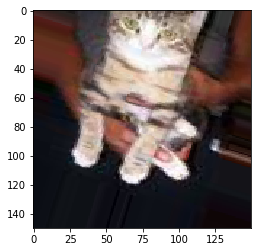

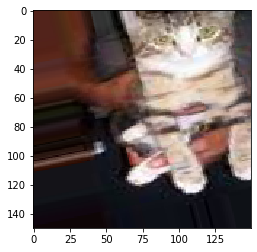

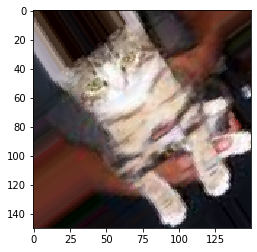

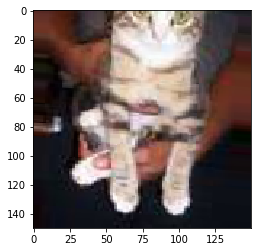

In [96]:
import matplotlib.pyplot as plt
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()